## Final Project Submission

Please fill out:
* Student name: Kipchumba Brian
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Mark Tiba
* Blog post URL:


# 1. Introduction

##  1.1 Overview

The giant tech company Microsoft has decided that its time to venture into creating original video content and
therefore want to create a movie studio.  Using the data from various website containing information about the movie industry. My goal is to use  exploratory data anaylysis in order to produce insights to Microsoft  as they venture into the movie industry.

## 1.2 Objectives

1. Business Understanding<br>
2. Data Understanding<br>
3. Data Preparation<br>
4. Data Analysis<br>
5. Conclusion

# 2. Business understanding

Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. 
I have  been charged with exploring what types of films are currently doing the best at the box office. 
and give three recommendation

## 2.1 Business Questions 

For me to translate these findings into actionable insights in order to help 
<br>Microsoft build a  new movie studio, I should ask the important business questions <br>
<br>     1.Does the movie rating affect domestic gross and foreign gross?<br>
<br>      2.What movies are highly rated, have high domestic gross  and which studio produced them?<br>
 <Br>     3 Does avarage rating affect the number of votes?
    

Completing data analysis and answering the above questions will solve Microsost's quest for the Movie industry. 
They will have more information on the type of movies they are suppose to air in there anticipated Movie industry

# 3.  Data understanding

The data I am going to use in this Data analysis are  from Various websites contain information about the Box office
These datasets will enable me to understand the trends in the movie industry and therefore I will be able to produce the relevant 
information for microsoft so that they will be able to correctly execute they dream of becoming succesful in the movie industry

These  datasets include<br>
 **movie_gross.csv**<br>
 **movie_info.tsv**<br>
 **rt.reviews.tsv**<br>
 **tmdb.movies.csv**<br>
 **movie_budgets.csv**<br>

are in the zippedData folder are from the following websites<br>
[Box Office Mojo](https://www.boxofficemojo.com/)<br>
[IMDB](https://www.imdb.com/)<br>
[Rotten Tomatoes](https://www.rottentomatoes.com/)<br>
[TheMovieDB](https://www.themoviedb.org/)<br>
[The Numbers](https://www.the-numbers.com/)<br>

# 3.1 Loading Libraries and Datasets

In [1]:
# importing the packages I will be using for this project
import zippedData
import numpy as np
import sqlite3
import pandas as pd
conn = sqlite3.connect("data/im.db")
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [2]:
#loading datasets

df_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
df_movie_info = pd.read_table('data/rt.movie_info.tsv')
df_reviews = pd.read_table('data/rt.reviews.tsv',encoding = 'unicode_escape' )
df_movies= pd.read_csv('data/tmdb.movies.csv')
df_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

# 3.2 Previewing the Datasets and getting information about dataset

## 3.2.1 df_movie_gross

In [3]:
#previewing df_movie_gross

df_movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [4]:
# Accessing more information about df_movie_gross

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


This shows that the datas has 3 data types : object, float64 and interger.<br>
  The column names include title, studio, domestic_gross, foreign_gross and year
  

In [5]:
#checking the shape

df_movie_gross.shape

(3387, 5)

This shows that the data 3387 rows and 5 columns

In [6]:
#checking for descriptive statistics

df_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Above are the descriptive statistics of the data

# 3.2.2 Previewing df_movie_info

In [7]:
#previewing df_movie_info

df_movie_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [8]:
#checking the data information

df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


This shows that the datas has 2 data types : object and integer. <br>
  The columns include id, synopsis, rating, director, writer, theater_date, dvd_date, currency, box_office, runtime and studio

In [9]:
#cheking the shape of data

df_movie_info.shape

(1560, 12)

The data has 1560 columns and 12 rows

In [10]:
#checking for descriptive statistics

df_movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


Above are the descriptive statistics of the data

# 3.2.3 Previewing df_reviews


In [11]:
#previewing df_reviews 

df_reviews.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


In [12]:
#checking the data information

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


The data has 2 data types : Interger and object. 
The columns include id, review, rating, fresh, critic, top_critic, publisher and date

In [13]:
#checking the shape of the dataset 

df_reviews.shape

(54432, 8)

The data has 54432 columns and 8 rows

In [14]:
#checking the dataset information

df_reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


Above are the descriptive statistics of the data

# 3.2.4 Previewing df_movies

In [15]:
#previewing the df_movies

df_movies.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [16]:
#checking the dataset information

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


The data has 3 types : integer, object and float. <br>
The columns include genre_ids, id, original_langauge, oriinal_title, popularity, release_date, title, vote_avarage and vote_count

In [17]:
#checking the shape of the dataset

df_movies.shape

(26517, 10)

The data has 26517 rows and 10 columns 

In [18]:
#checking the descriptive statistics

df_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


Above are the descriptive statistics of the data

# 3.2.5 Previewing df_movie_budgets


In [19]:
#previewing the df_movie_budgets

df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
#checking the dataset information

df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data has 2 types : integer and object.
The columns includes id, rerlease_date, production_budget, domestic_gross and worldwide_gross

In [21]:
#checking the shape of the dataset

df_movie_budgets.shape

(5782, 6)

The data has 5782 columns nad 6 rows

In [22]:
#checking for descriptive statistics

df_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Above are the descriptive statistics of the data

# 3.2.6 Previewing df_movie_basics

In [23]:
#previewing df_movie_basics

df_movie_basics = pd.read_sql_query("""
SELECT *
FROM movie_basics
;
""", conn)
df_movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [24]:
#checking the dataset information

df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The data has 3 data types : object, integer and float.<br>
Columns include movie_id, primary_title, original_title, start_year, runtime_minutes and genres

In [25]:
#checking the shape of the dataset

df_movie_basics.shape

(146144, 6)

The data has 146144 columns and 6 rows

In [26]:
#checking for descriptive statistics

df_movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Above are the descriptive statistics of the data

# 3.2.7 Previewing df_movie_ratings

In [27]:
#previewing movie_ratings

df_movie_ratings = pd.read_sql_query("""
SELECT *
FROM movie_ratings
;
""", conn)
df_movie_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [28]:
#checking the dataset information

df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The data has 3 data types : object, integer and float. 
    The columns are movie_id, averagerating and numvotes

In [29]:
#checking the shape of the dataset

df_movie_basics.shape

(146144, 6)

The data has 73856 columns and 3 rows

In [30]:
#checking for descriptive statistics

df_movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Above are the descriptive statistics of the data

# 3.3 Relevant dataset and the limitation

After carefully scrutinizing the above datasets, 3 datasets stand out and they most relevant for my analysis and are able to answer the 3 business questions
This are 3 datasets<br> **1. df_movie_gross** <br> **2. df_movie_basics**<br> **3. df_movie_ratings**

One  limitation is the movie industry evolves drastically and the data we are using may cannot anticipate the changes that
may occur. A perfect example is that as the years progress, the new generation may be inclined to new types of genres of movies.
Hence by the time Microsoft has already started there movie industry, they could be changes is movie preference

# 4.Data Preparation and Data cleaning

## 4.1 df_movie_gross

In [31]:
#previewing df_movie_basics

df_movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [32]:
#getting shape
df_movie_gross.shape

(3387, 5)

In [33]:
print("Number of rows",df_movie_gross.shape[0])
print("Number of columns",df_movie_gross.shape[1])

Number of rows 3387
Number of columns 5


In [34]:
# Accessing more information about df_movie_gross

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Data types above do not correspond to the data inside them. Because foreign gross is object instead of integer

In [35]:
#checking for null values

df_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The dataset has null values

In [36]:
# calculating percentage of missing data

percent_missing = df_movie_gross.isnull().sum() * 100 / len(df_movie_gross)
percent_missing

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

Now that we know how many the percentage of  missing values in each column, From the above data, 
Since grossing is a factor that is to be investigated we should retained the column but drop the rows instead

In [37]:
#dropping null values

df_movie_gross.dropna(inplace=True)
df_movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [38]:
#checking the shape of data

df_movie_gross.shape

(2007, 5)

We now have 2007 rows and 5 columns

In [39]:
# check for duplicates in the data

df_movie_gross.duplicated(subset=['title']).sum()

0

The data has no duplicates

In [40]:
#checking information of the refined dataset

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


It can be seen that the domestic_gross column is of type float. <br>
It will be preferable to convert in into integer type
because that column will be usefull in answering the first business question

In [41]:
# converting the columns to integers

df_movie_gross['domestic_gross'] = df_movie_gross['domestic_gross'].astype('int')

In [42]:
#converting  the foreign_gross to float

df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].replace('[^.0-9]', '', regex=True).astype('float32')

In [43]:
#converting  the foreign_gross to integer
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].replace('[^.0-9]', '', regex=True).astype('int64')

In [44]:
#checking if there there is changes in the columns

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int32 
 3   foreign_gross   2007 non-null   int64 
 4   year            2007 non-null   int64 
dtypes: int32(1), int64(2), object(2)
memory usage: 86.2+ KB


The foreign_gross has been changed to integer

In [45]:
# check for duplicates in the data

df_movie_gross.duplicated(subset=['title']).sum()

0

The dataset doesnt have duplicates

## 4.2 df_movie_basics

In [46]:
#preview of the dataset

df_movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


The dataset appears to have 3 data types : float interger and object and they conforms to the data inside

In [47]:
#getting the shape of the dataset

df_movie_basics.shape

(146144, 6)

In [48]:
print("Number of rows",df_movie_basics.shape[0])
print("Number of columns",df_movie_basics.shape[1])

Number of rows 146144
Number of columns 6


In [49]:
# Accessing more information about df_movie_basics

df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


All column data types above correspond to the data inside them

In [50]:
#checking for null values

df_movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The dataset has null values in all columns except movie_id, primary_title <br>
 and start_year. There several null values especially in the columns of runtime_minutes and genres. 

In [51]:
# calculating percentage of missing data

percent_missing = df_movie_basics.isnull().sum() * 100 / len(df_movie_basics)
percent_missing

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

The runtime_minutes column is not important in answering the business questions  formulated but genres column does.<br> But it is appropriate that to drop the runtime_minutes  column and
to drop the rows of null values in genres and also in the column of original_title

In [52]:
# dropping the column

df_movie_basics.drop(columns=['runtime_minutes'], inplace=True)

In [53]:
#previewing the new dataset

df_movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama


The runtime_minutes column has been drop. Now it is time to drop the Rows with null values in genres and the origina_title
It appropriate to replace the missing values in the rows of original_title because they are few missing values. It best to replace the missing values because the rows could be usefull in the analysis

In [54]:
#dropping the rows with null values

df_movie_basics.dropna(inplace= True)

In [55]:
# filling null values with a placeholder

df_movie_basics.fillna('MISSING', inplace=True)

In [56]:
# checking for duplicates

df_movie_basics.duplicated(subset= ['primary_title', 'start_year']).sum()

1810

It appears that there are 1810 missing values in the dataset and it is best if we drop them

In [57]:
# dropping the duplicate rows

df_movie_basics.drop_duplicates(subset= ['primary_title', 'start_year'], inplace = True)

Duplicated rows have been dropped 

In [58]:
#preview the shape renewed datset

df_movie_basics.shape

(138924, 5)


The renewed dataset has 138924 Rows and 5 columns

In [59]:
#getting info of the new dataset

df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138924 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   movie_id        138924 non-null  object
 1   primary_title   138924 non-null  object
 2   original_title  138924 non-null  object
 3   start_year      138924 non-null  int64 
 4   genres          138924 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.4+ MB


The dataset is now free of null values. It has 2 datatypes : interger and object 

In [60]:
df_movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama


# 4.3 df_movie_ratings

In [61]:
#preview of the dataset

df_movie_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [62]:
# Accessing more information about df_movie_basics

df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


There are 3 data types in the dataset : object, float and interger and the data inside conforms to the data types.

It is time to check for missing values and duplicated values

In [63]:
# checking for duplicate values

df_movie_ratings.duplicated(subset=['movie_id']).sum()

0

The dataset appears to not have duplicates

In [64]:
#getting shape

df_movie_ratings.shape

(73856, 3)

The dataset has 73856 rows and 3 columns

In [65]:
#checking for null values

df_movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

The dataset 
has no null values

In [66]:
#checking the descriptive statistics

df_movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Above are the descriptives of the dataset

In [67]:
# check for duplicates in the data

df_movie_ratings.duplicated().sum()

0

The dataset has no null values

In [68]:
#getting the shape of the dataset

df_movie_ratings.shape

(73856, 3)

# 4.4 Merging Datasets

In order to merge the data frames, a column is identified in the dataframes with the same data.
In the df_movie_basics and  df_movie_basics datasets, they all have a column with called movie_id and that what Will be appropriate 
to merge the the dataframes

But first I should set the index of both dataframes to the to movie_id in order to be able to merge

In [69]:
#setting movie id to be the index

df_movie_basics.set_index('movie_id').head(3)

,primary_title,original_title,start_year,genres
movie_id,,,,
tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama


In [70]:
# setting movie id to be the index

df_movie_ratings.set_index('movie_id').head(3)

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20


In [71]:
#merging the 2 dataframes

df_basics_ratings = pd.merge(df_movie_basics, df_movie_ratings, how = 'inner')

df_basics_ratings.head(3)

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517


In [72]:
df_basics_ratings_gross = pd.merge(df_basics_ratings, df_movie_gross , how = 'inner', 
                                   left_on = 'original_title', right_on = 'title')
df_basics_ratings_gross.head(3)

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000,8000000,2012
1,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,On the Road,IFC,744000,8000000,2012
2,tt5647250,On the Road,On the Road,2016,Drama,5.7,127,On the Road,IFC,744000,8000000,2012


The dataframe has 12 columns.The columns of primary_title, secondary_title and title all represent the same thing.
Just like start_year and year whic represent the same value
It is appropriate that I drop all unneccessary columns

I am going to drop the primary_title, original_title and year

In [73]:
# dropping unnecessary columns

df_basics_ratings_gross.drop(columns=['primary_title', 'original_title', 'year'], inplace=True)

In [74]:
#previewing the datset 

df_basics_ratings_gross.head(3)

,movie_id,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross
0,tt0337692,2012,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000,8000000
1,tt4339118,2014,Drama,6.0,6,On the Road,IFC,744000,8000000
2,tt5647250,2016,Drama,5.7,127,On the Road,IFC,744000,8000000


In [75]:
# checking for null values

df_basics_ratings_gross.isna().sum()

movie_id          0
start_year        0
genres            0
averagerating     0
numvotes          0
title             0
studio            0
domestic_gross    0
foreign_gross     0
dtype: int64

The final combined dataset has no null values

In [76]:
# checking for duplicates

df_basics_ratings_gross.duplicated(['movie_id']).sum()

0

The combined datasets has no dupicates

The dataset has 2 data types : interger and float.

In [77]:
# Exporting this combined dataframe to a csv

df_basics_ratings_gross.to_csv('Combined Microsoft Data.csv')

# 5. Data Analysis (EDA)

## 5.1 Does the movie Average rating affect domestic gross and foreign gross?

In [78]:
#checking the datset
df_basics_ratings_gross.head(3)

,movie_id,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross
0,tt0337692,2012,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000,8000000
1,tt4339118,2014,Drama,6.0,6,On the Road,IFC,744000,8000000
2,tt5647250,2016,Drama,5.7,127,On the Road,IFC,744000,8000000


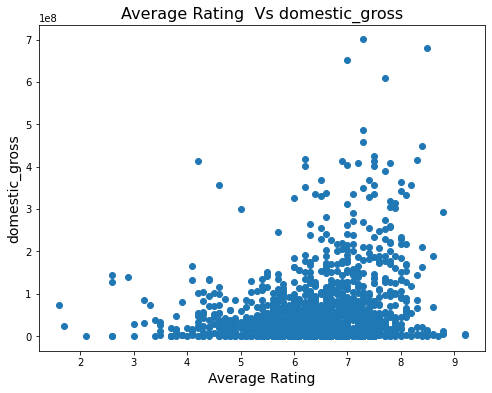

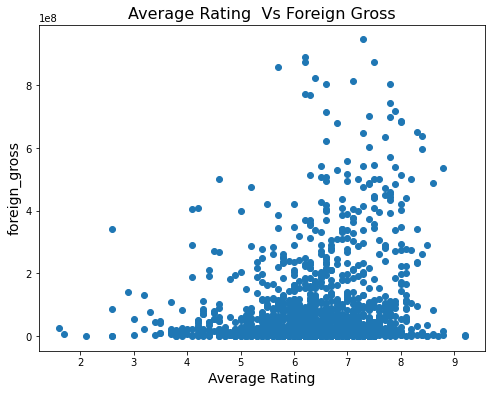

In [79]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = df_basics_ratings_gross['averagerating']
y = df_basics_ratings_gross['domestic_gross']

ax.scatter(x,y)

ax.set_title('Average Rating  Vs domestic_gross', fontsize=16)
ax.set_xlabel("Average Rating",fontsize=14)
ax.set_ylabel("domestic_gross", fontsize=14)
fig.savefig('Average Rating vs Domestic Gross');


# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = df_basics_ratings_gross['averagerating']
y = df_basics_ratings_gross['foreign_gross']

ax.scatter(x,y)

ax.set_title('Average Rating  Vs Foreign Gross', fontsize=16)
ax.set_xlabel("Average Rating",fontsize=14)
ax.set_ylabel("foreign_gross", fontsize=14)
fig.savefig('Average Rating vs foreign Gross');

As we can see from the plots above  avarage rating positively correlates with both Domestic and foreign gross 

## 5.2 What movies are highly rated, have high domestic gross  and which studio produced them?

In [80]:
# Sorting to find movies with the highest ratings per votes cast

df_basics_ratings_gross = df_basics_ratings_gross.sort_values('averagerating',ascending=False).reset_index(drop=True)

df_basics_ratings_gross.head(3)

,movie_id,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross
0,tt6168914,2019,Adventure,9.2,47,The Runaways,App.,3600000,1100000
1,tt1455256,2010,Documentary,9.2,8,The Wall,RAtt.,1800000,2700000
2,tt9151704,2018,"Documentary,Music",8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000,16100000


In [81]:
# movies with the highest ratings

df_basics_ratings_gross.loc[:,['title','averagerating','studio']].head()

,title,averagerating,studio
0,The Runaways,9.2,App.
1,The Wall,9.2,RAtt.
2,Burn the Stage: The Movie,8.8,Trafalgar
3,Upgrade,8.8,BH Tilt
4,Inception,8.8,WB


In [82]:
# Rearanging to find movies with the highest total grossing

df_basics_ratings_gross = df_basics_ratings_gross.sort_values('domestic_gross', ascending = False).head(10)
df_basics_ratings_gross.reset_index(drop=True).head(3)

,movie_id,start_year,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross
0,tt1825683,2018,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000,646899968
1,tt4154756,2018,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000,1369
2,tt0369610,2015,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000,1019


In [83]:
# movies with the highest ratings

df_basics_ratings_gross.loc[:,['title','domestic_gross','studio']].head(3)

,title,domestic_gross,studio
278,Black Panther,700100000,BV
13,Avengers: Infinity War,678800000,BV
459,Jurassic World,652300000,Uni.


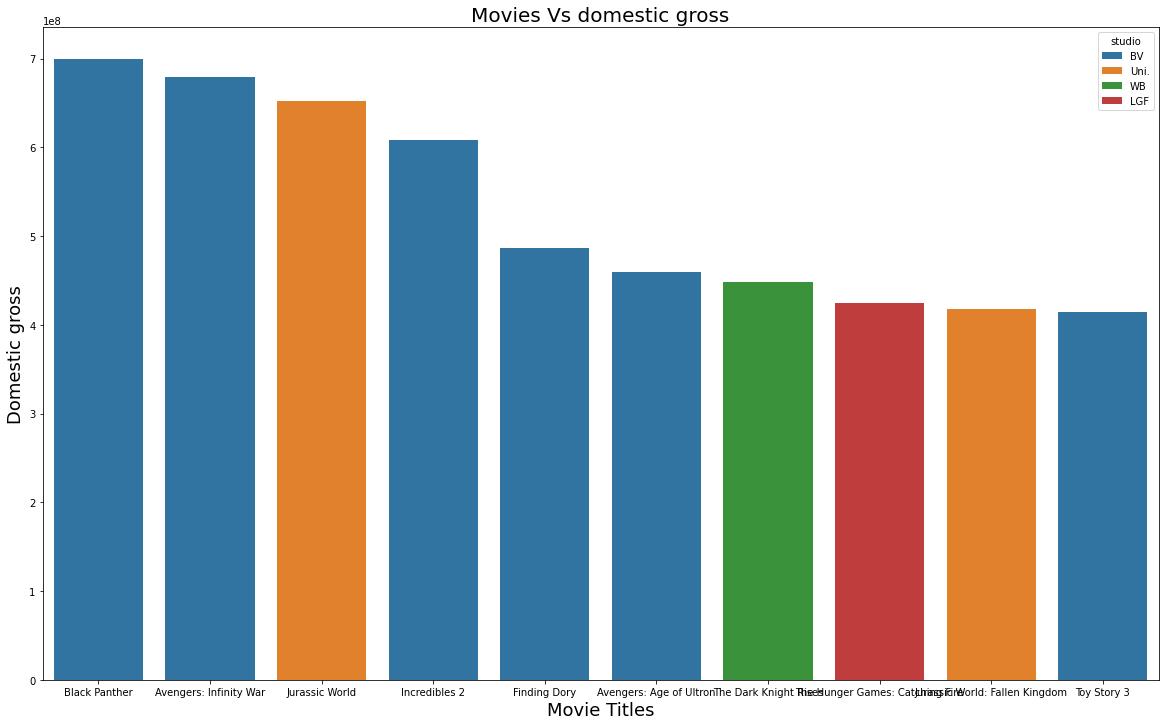

In [87]:
# plotting the data to show movies with the highest total gross

fig, ax1= plt.subplots(figsize=(20,12))

x = list(df_basics_ratings_gross['title'].values)
y = df_basics_ratings_gross['domestic_gross']

ax1 = sns.barplot(data = df_basics_ratings_gross, x = 'title', y = 'domestic_gross',hue = 'studio',ax = ax1, dodge=False)

ax1.set_title('Movies Vs domestic gross', fontsize=20)
ax1.set_xlabel("Movie Titles",fontsize=18)
ax1.set_ylabel("Domestic gross", fontsize=18)
fig.savefig('Movies Vs domestic gross')


plt.show()

From the plots above we can see that Movies produced BV studio has the highest Total gross followed closely by Universal

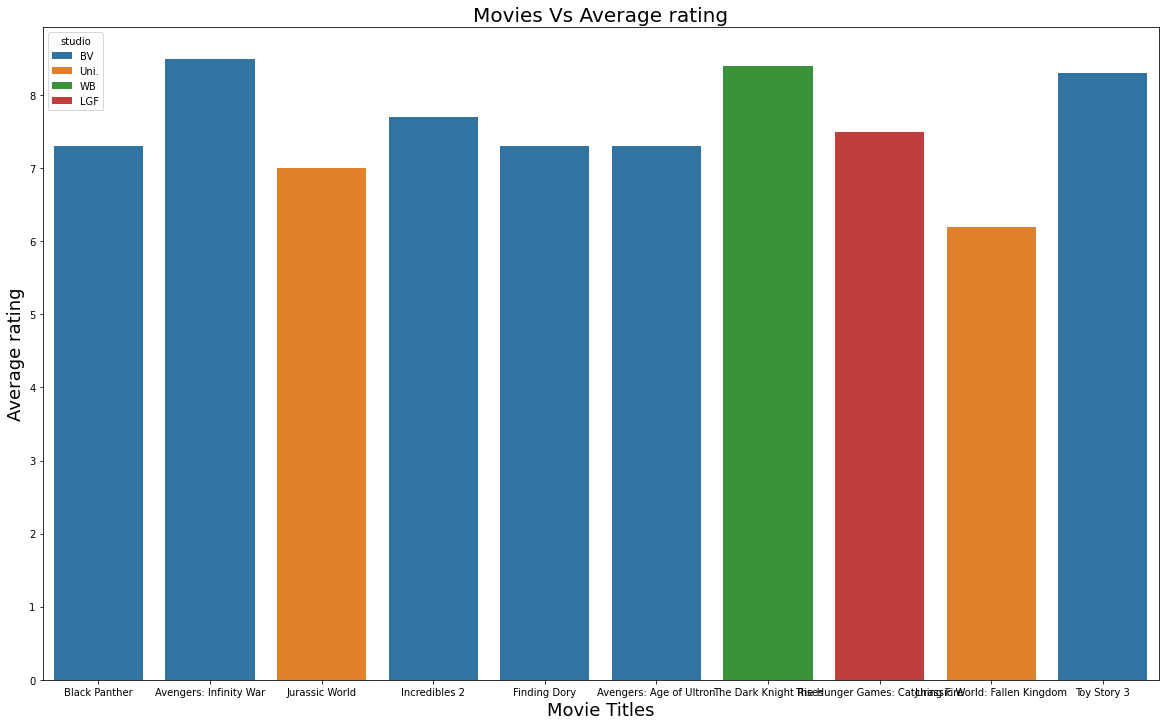

In [89]:
# plotting the data movies with the highest ratings

fig, ax1= plt.subplots(figsize=(20,12))

x = list(df_basics_ratings_gross['title'].values)
y = df_basics_ratings_gross['averagerating']

ax1 = sns.barplot(data = df_basics_ratings_gross, x = 'title', y = 'averagerating',hue = 'studio',ax = ax1, dodge=False)

ax1.set_title('Movies Vs Average rating', fontsize=20)
ax1.set_xlabel("Movie Titles",fontsize=18)
ax1.set_ylabel("Average rating", fontsize=18)
fig.savefig('Movies Vs Average rating')


plt.show()

The data above also shows that movies from studio BV produce the most amount of highly rated movies

# 5.3 Does avarage rating affect the number of votes

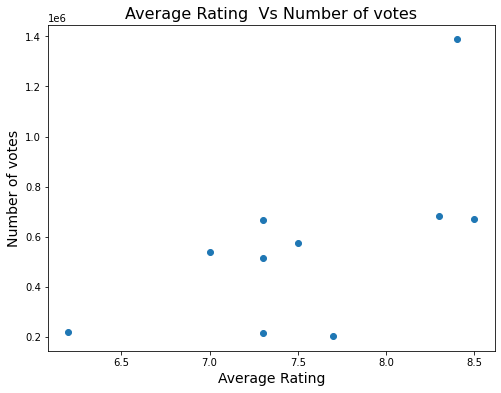

In [86]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = df_basics_ratings_gross['averagerating']
y = df_basics_ratings_gross['numvotes']

ax.scatter(x,y)

ax.set_title('Average Rating  Vs Number of votes', fontsize=16)
ax.set_xlabel("Average Rating",fontsize=14)
ax.set_ylabel("Number of votes", fontsize=14)
fig.savefig('Average Rating vs Number of votes');

From the graph above we can tell that rating the higher the Number of votes it will get

# 6. Conclusion

1. Movies with high ratings will produce the  Both high domestic gross and foreign income <br>
2. The studio BV is the one dominating the market with production of Movies with the highest rating and also 
most of those highly rated movies are Fiction<br>
3. Highest rated movies are like to get the most votes <br>